In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
#Graficos con Seaborn
import seaborn as sns; sns.set()
style.use('ggplot')
from sklearn import svm


In [11]:
from sklearn.datasets.samples_generator import make_blobs

In [18]:
X,Y = make_blobs(n_samples=50, centers=2 , random_state=0, cluster_std=0.6)


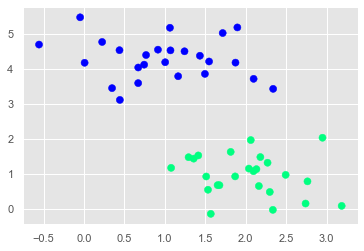

In [23]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="winter")
plt.show()

(-1, 3)

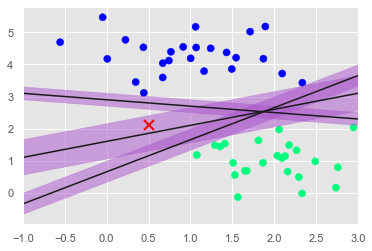

In [100]:
xx= np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="winter")
plt.plot([0.5], [2.1], 'x' , color="red", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2 )]:
    yy= a*xx+b 
    plt.plot(xx, yy , 'k-')
    plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color="#aa55cc", alpha=.5)
plt.xlim(-1,3,5)


### SVM maximixaría  ycrearia un corredor lo suficientemente ancho para corregir este problema

In [38]:
from sklearn.svm import SVC
model= SVC(kernel="linear", C= 1E10)
model.fit(X,Y)


SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
def plot_svc(model, ax=None, plot_support=True):
    """ Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    ## Genramos la parrilla de puntos para evaluar el Modelo
    
    ### Muestra 30 puntos
    xx= np.linspace(xlim[0], xlim[1],30)
    yy= np.linspace(ylim[0], ylim[1],30)
    Y,X=np.meshgrid(yy,xx)
    
    #TUpla T
    #xy=np.vstack([X.ravel(), Y.ravel()]).T
    xy=(np.vstack([X.ravel(), Y.ravel()])).T
    P = model.decision_function(xy).reshape(X.shape)
    
        ## Representamos las fronteras y los margenes del SVC
    ax.contour(X,Y,P, colors="k", levels= [-1,0,1] , alpha=0.5, linestyles=["--","-", "--"])
    #print("Vectores de soporte:")
    #print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1],
                   s=100, linewidth=1, facecolors="black")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
        

'Los vectoresde soporte son el pibote del algoritmo para definir el hiperplano de clasificación'

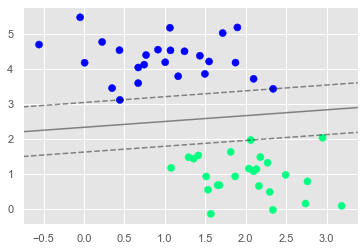

In [122]:
plt.scatter(X[:,0], X[:,1] , c= Y, s=50, cmap="winter")
plot_svc(model, plot_support=False)
"Los vectoresde soporte son el pibote del algoritmo para definir el hiperplano de clasificación"

In [123]:
def plot_svm(N=10, ax=None):
    X,Y =make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.6)
    X= X[:N]
    Y= Y[:N]
    model= SVC(kernel="linear", C= 1E10)
    model.fit(X,Y)
        
    ax= ax or plt.gca()
    ax.scatter(X[:,0], X[:,1] , c=Y, s=50, cmap="summer")
    ax.set_xlim=(-1,4)
    ax.set_ylim=(-1,6)
    plot_svc(model, ax)
    


TypeError: 'tuple' object is not callable

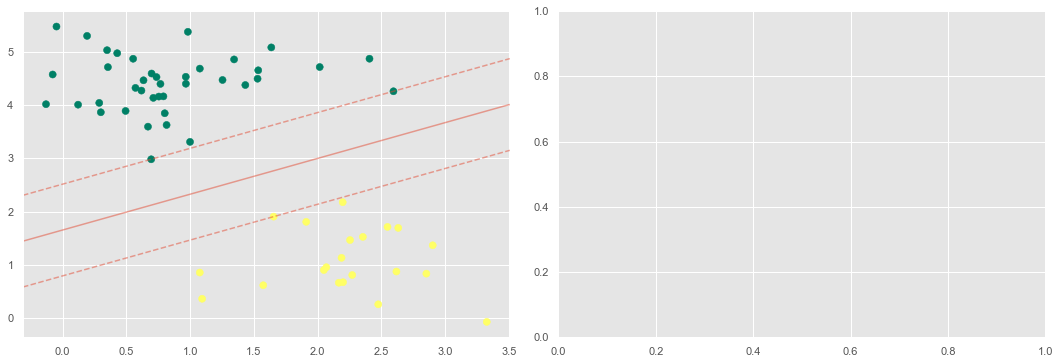

In [124]:

fig, ax= plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for ax_i, N,  in zip(ax, [60,61]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))